# Using Baselines3


[Stable-Baselines3](https://github.com/araffin/rl-tutorial-jnrr19/tree/sb3/) is a library that implements RL algorithms and creates user interfaces that simplify algorithm testing. It is like having ready-made black boxes containing algorithms. The information of the networks and so on, however, is visible.

In this case were gonna declare a DDPG algorithm from the library and use the PassageEnv to train it.

Models are charged calling the modules from the library: `from stable_baselines3 import DDPG`, and then using a declaration of the enviroment as: `model = DDPG(MlpPolicy, env)`. The enviroment must to be declared previously using the [OpenAi template](https://www.gymlibrary.dev/content/environment_creation/). The same model could use different policies implementations.

In [1]:
import gym
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3 import DDPG
#from stable_baselines import TRPO
from stable_baselines3.ddpg.policies import MlpPolicy

2023-03-20 06:56:32.990191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 06:56:33.105618: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-20 06:56:33.637384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kennet/anaconda3/envs/drl_env/lib/python3.9/site-packages/cv2/../../lib64:
2023-0

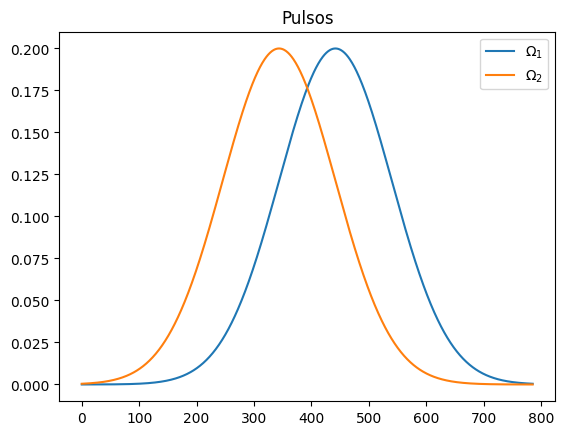

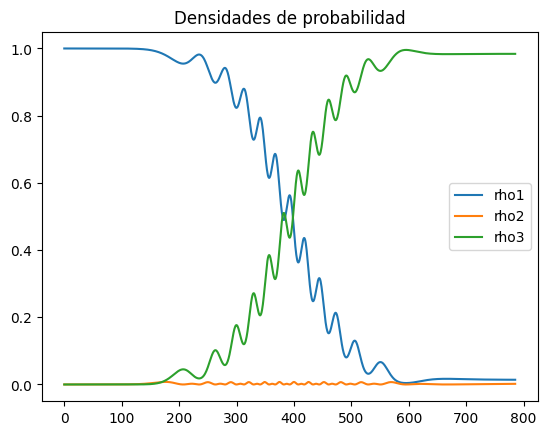

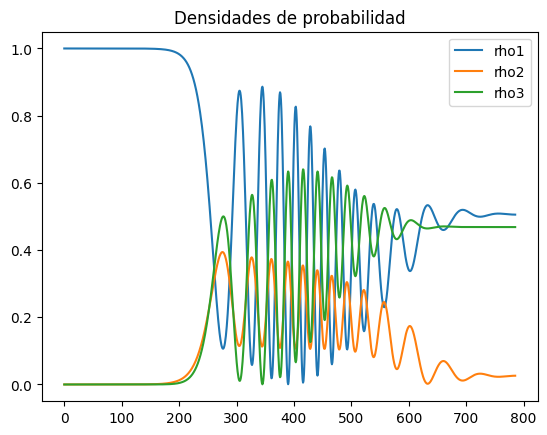

/home/kennet/anaconda3/envs/drl_env/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [2]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import matplotlib.pyplot as plt
from Enviroment import PassageEnv

# Lets call our enviroment
env = PassageEnv()

# Defining the agent
model = DDPG(MlpPolicy, env)

## Training the agent

In [3]:
N_steps = 1200
model.learn(total_timesteps=N_steps)

/home/kennet/anaconda3/envs/drl_env/lib/python3.9/site-packages/stable_baselines3/common/vec_env/dummy_vec_env.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  obs, self.buf_rews[env_idx], self.buf_dones[env_idx], self.buf_infos[env_idx] = self.envs[env_idx].step(
/home/kennet/anaconda3/envs/drl_env/lib/python3.9/site-packages/stable_baselines3/common/vec_env/dummy_vec_env.py:105: ComplexWarning: Casting complex values to real discards the imaginary part
  self.buf_obs[key][env_idx] = obs
/home/kennet/anaconda3/envs/drl_env/lib/python3.9/site-packages/stable_baselines3/common/off_policy_algorithm.py:489: ComplexWarning: Casting complex values to real discards the imaginary part
  next_obs[i] = infos[i]["terminal_observation"]


# Results
To evaluate the performance of the agent and visualize the resulting actions, we are gonna study his behaviour producing a solution for the enviroment and recording populations $\rho$, actions $\Omega$, and the rewards to study the behaviours

Actions:


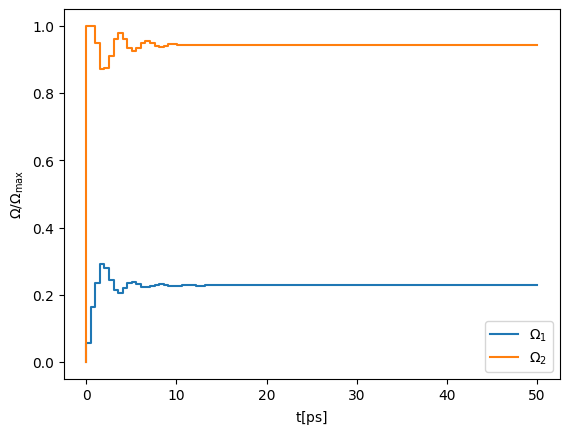

States:


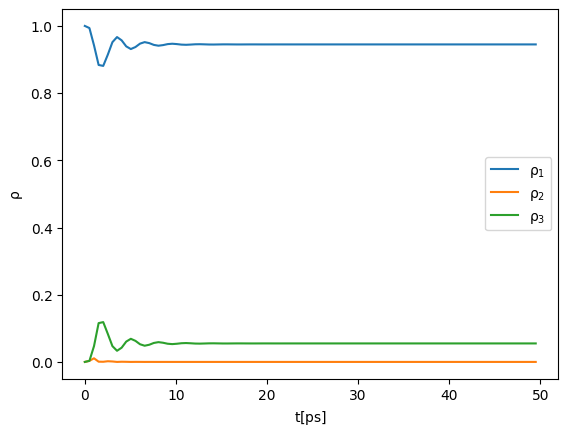

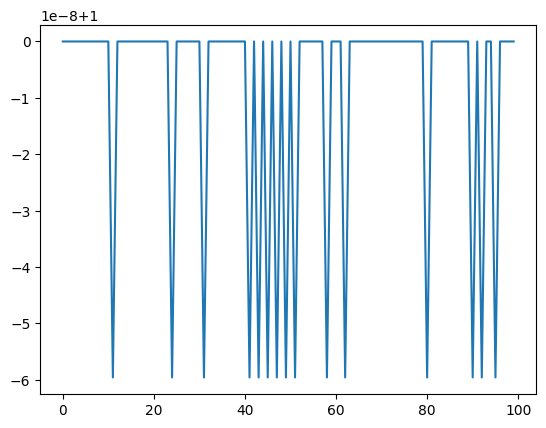

Reward:


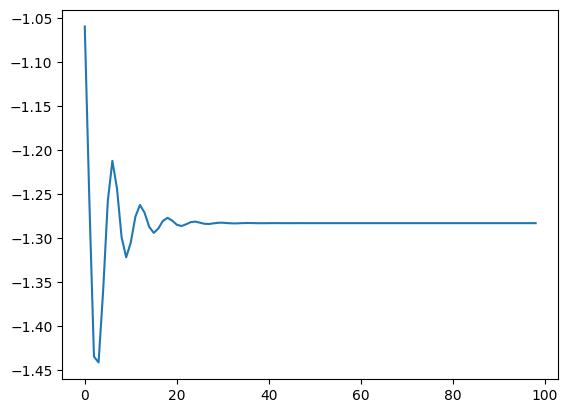

In [5]:
import os

# The direction to save the results
dir_path = "../results/baselines_imp/"
env = model.get_env()
episode_rewards = []
done = False
obs = env.reset()
actions = []
p1, p2, p3 = [obs[0][0]], [obs[0][4]], [obs[0][8]]
actions.append([[0,0]])
obs, reward, done, info = env.step(actions[0])
while not done:
    action, _states = model.predict(obs)
    actions.append(action)
    obs, reward, done, info = env.step(action)
    p1.append(obs[0][0])
    p2.append(obs[0][4])
    p3.append(obs[0][8])
    episode_rewards.append(reward)
actions = np.array(actions)
actions.shape

N = len(actions[:,0,0])
tmax = 50
#tmax = 10*np.pi
tpasos = np.linspace(0,tmax,N)
print('Actions:')
plt.xlabel('t[$\mathregular{ps}$]')
plt.ylabel('$\mathregular{\Omega/\Omega_{max}}$')
plt.step(tpasos, actions[:,0,0], label='$\mathregular{\Omega_{1}}$')
plt.step(tpasos, actions[:,0,1], label='$\mathregular{\Omega_{2}}$')
plt.legend()
path_img = dir_path+'actions.png'
plt.savefig(path_img, dpi=300, transparent=False, bbox_inches='tight')
plt.show()

print('States:')
plt.plot(tpasos[:-1], p1[:-1], label='$\mathregular{\\rho_1}$')
plt.plot(tpasos[:-1], p2[:-1], label='$\mathregular{\\rho_2}$')
plt.plot(tpasos[:-1], p3[:-1], label='$\mathregular{\\rho_3}$')
plt.legend()
plt.xlabel('t[$\mathregular{ps}$]')
plt.ylabel('$\mathregular{\\rho}$')

path_img = dir_path+'populations.png'
file_exists = os.path.exists(path_img)
if not file_exists:
  plt.savefig(path_img, dpi=300, transparent=False, bbox_inches='tight')
plt.show()
ptot = np.array(p1)+np.array(p2)+np.array(p3)
plt.plot(ptot)
plt.show()

print('Reward:')
path_img = dir_path+'reward.png'
plt.plot(episode_rewards)
plt.savefig(path_img, dpi=300, transparent=False, bbox_inches='tight')

path_actions1 = dir_path+'pulso1.csv'
path_actions2 = dir_path+'pulso2.csv'
file_exists = os.path.exists(path_actions1)
if not file_exists:
  np.savetxt(path_actions1, actions[:,0,0], delimiter=',')
  np.savetxt(path_actions2, actions[:,0,1], delimiter=',')

path_actionsrho1 = dir_path+'pulso1.csv'
path_actionsrho2 = dir_path+'pulso2.csv'
path_actionsrho3 = dir_path+'pulso3.csv'
file_exists = os.path.exists(path_actionsrho1)
if not file_exists:
  np.savetxt(path_actionsrho1, p1[:-1], delimiter=',')
  np.savetxt(path_actionsrho2, p2[:-1], delimiter=',')
  np.savetxt(path_actionsrho3, p3[:-1], delimiter=',')